# **Giới thiệu**

Project của Nhóm 5 về nhận diện cảm xúc trên các ảnh xám kích thước 48x48, được lưu dưới dạng mảng trong file csv. Tập dữ liệu được sử dụng là *FER-2013* (tập huấn luyện gồm 28709 ảnh, tập kiểm thử gồm 3589 ảnh).

Nhiệm vụ cần làm là phân loại xem mỗi bức ảnh thể hiện cảm xúc gì: (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

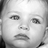

In [ ]:
img = array_to_img(X_train[1500])
img

In [ ]:
y_train[1500]

6

# **1. Khai báo thư viện**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd

In [ ]:
from keras.models import Model
from keras.layers import RandomFlip, RandomContrast, RandomRotation
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

from keras.layers.merge import concatenate
from keras.preprocessing.image import array_to_img
from keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from keras.models import Sequential, load_model

In [ ]:
!pip install visualkeras
import visualkeras

     |████████████████████████████████| 992 kB 8.8 MB/s 


# **2. Lấy dữ liệu từ tệp và Tiền xử lí dữ liệu**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/fer2013.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_train = []
y_train = []
X_test = []
y_test = []
for index, row in df.iterrows():
    k = row['pixels'].split(" ")
    if row['Usage'] == 'Training':
        X_train.append(np.array(k))
        y_train.append(row['emotion'])
    elif row['Usage'] == 'PublicTest':
        X_test.append(np.array(k))
        y_test.append(row['emotion'])
        
X_train = np.array(X_train, dtype = 'int32')
y_train = np.array(y_train, dtype = 'int32')
X_test = np.array(X_test, dtype = 'int32')
y_test = np.array(y_test, dtype = 'int32')

**Tiền xử lí dữ liệu**

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [ ]:
data_augmentation = Sequential([
    RandomContrast((0.2, 0.4)),
    RandomFlip("horizontal"),
    RandomRotation(0.2)
])

In [ ]:
y_train2 = pd.get_dummies(y_train)

# **3. Mô hình**

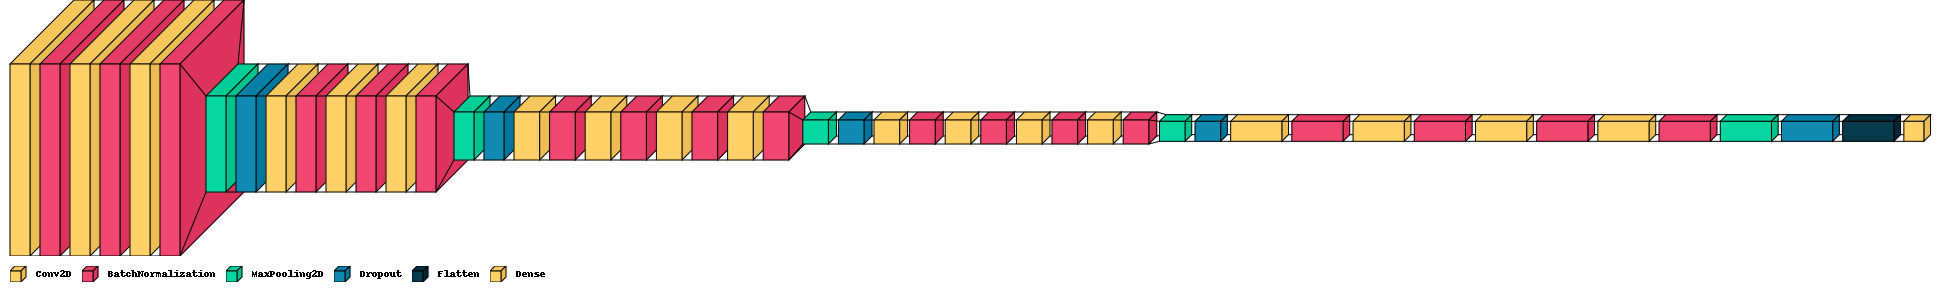

In [ ]:
visualkeras.layered_view(seq, legend=True)

**Khởi tạo mô hình**

In [ ]:
seq = Sequential()
seq.add(data_augmentation)
seq.add(Input(shape=(48,48,1), name='input'))
seq.add(Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_1'))
seq.add(BatchNormalization())
seq.add(Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_2'))
seq.add(BatchNormalization())
seq.add(Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_3'))
seq.add(BatchNormalization())
seq.add(MaxPooling2D(pool_size=(2,2), name = 'pool1_1'))
seq.add(Dropout(0.3, name = 'drop1_1'))
seq.add(Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_1'))
seq.add(BatchNormalization())
seq.add(Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_2'))
seq.add(BatchNormalization())
seq.add(Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_3'))
seq.add(BatchNormalization())
seq.add(MaxPooling2D(pool_size=(2,2), name = 'pool2_1'))
seq.add(Dropout(0.3, name = 'drop2_1'))
seq.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_1'))
seq.add(BatchNormalization())
seq.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_2'))
seq.add(BatchNormalization())
seq.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_3'))
seq.add(BatchNormalization())
seq.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_4'))
seq.add(BatchNormalization())
seq.add(MaxPooling2D(pool_size=(2,2), name = 'pool3_1'))
seq.add(Dropout(0.3, name = 'drop3_1'))
seq.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_1'))
seq.add(BatchNormalization())
seq.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_2'))
seq.add(BatchNormalization())
seq.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_3'))
seq.add(BatchNormalization())
seq.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_4'))
seq.add(BatchNormalization())
seq.add(MaxPooling2D(pool_size=(2,2), name = 'pool4_1'))
seq.add(Dropout(0.3, name = 'drop4_1'))
seq.add(Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_1'))
seq.add(BatchNormalization())
seq.add(Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_2'))
seq.add(BatchNormalization())
seq.add(Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_3'))
seq.add(BatchNormalization())
seq.add(Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_4'))
seq.add(BatchNormalization())
seq.add(MaxPooling2D(pool_size=(2,2), name = 'pool5_1'))
seq.add(Dropout(0.3, name = 'drop5_1'))
seq.add(Flatten(name = 'flatten'))
seq.add(Dense(7, activation='softmax', name = 'output'))

seq.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Huấn luyện mô hình**

In [ ]:
his = seq.fit(X_train, y_train2, batch_size=50, epochs=100)

Epoch 1/100
575/575 [==============================] - 52s 68ms/step - loss: 2.1712 - accuracy: 0.2269
Epoch 2/100
575/575 [==============================] - 39s 69ms/step - loss: 1.8340 - accuracy: 0.2731
Epoch 3/100
575/575 [==============================] - 40s 69ms/step - loss: 1.6725 - accuracy: 0.3335
Epoch 4/100
575/575 [==============================] - 40s 70ms/step - loss: 1.5219 - accuracy: 0.4080
Epoch 5/100
575/575 [==============================] - 40s 70ms/step - loss: 1.4214 - accuracy: 0.4512
Epoch 6/100
575/575 [==============================] - 40s 70ms/step - loss: 1.3677 - accuracy: 0.4739
Epoch 7/100
575/575 [==============================] - 40s 70ms/step - loss: 1.3213 - accuracy: 0.4908
Epoch 8/100
575/575 [==============================] - 41s 71ms/step - loss: 1.2840 - accuracy: 0.5073
Epoch 9/100
575/575 [==============================] - 41s 71ms/step - loss: 1.2612 - accuracy: 0.5208
Epoch 10/100
575/575 [==============================] - 41s 71ms/step - l

**Trực quan hóa**

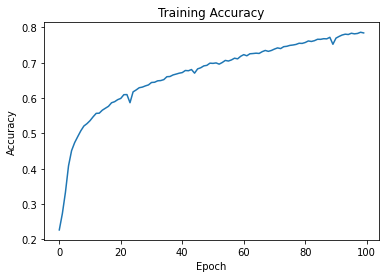

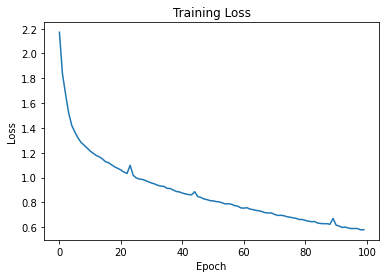

In [ ]:
# summarize history for accuracy
plt.plot(his.history['accuracy'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
# summarize history for loss
plt.plot(his.history['loss'])
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

**Chạy mô hình trên tập kiểm thử**

In [ ]:
sz = len(y_test)
sz

3589

In [ ]:
y_pt = seq.predict(X_test)

In [ ]:
y_p = []
for i in range(sz):
    y_p.append(np.argmax(y_pt[i]))

In [ ]:
mat = confusion_matrix(y_test, y_p, labels=[0,1,2,3,4,5,6])
mat

array([[245,   2,  52,  13,  74,   9,  72],
       [ 11,  27,   5,   1,   7,   0,   5],
       [ 44,   2, 226,  10, 107,  38,  69],
       [ 14,   1,  14, 754,  17,  24,  71],
       [ 45,   1,  62,  15, 385,   7, 138],
       [ 11,   0,  35,  16,   6, 331,  16],
       [ 24,   0,  23,  46,  83,  10, 421]])

**Kết quả: Accuracy trên tập kiểm thử**

In [ ]:
truee = 0
for i in range(7):
    truee += mat[i,i]
truee / sz

0.6656450264697688

> *Nhận xét:* Accuracy trên tập test thấp hơn trên tập train khá nhiều. Rất có thể mô hình đã bị overfitting.



# **4. Điều chỉnh lại mô hình**

*Tóm tắt:* Trong thí nghiệm ở phần này, nhóm đã thay đổi siêu tham số *rate* của Dropout layers của mô hình từ 0.3 lên 0.35. Quá trình huấn luyện giảm từ 100 xuống 88 epochs.

In [ ]:
seq = Sequential()
seq.add(data_augmentation)
seq.add(Input(shape=(48,48,1), name='input'))
seq.add(Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_1'))
seq.add(BatchNormalization())
seq.add(Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_2'))
seq.add(BatchNormalization())
seq.add(Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_3'))
seq.add(BatchNormalization())
seq.add(MaxPooling2D(pool_size=(2,2), name = 'pool1_1'))
seq.add(Dropout(0.35, name = 'drop1_1'))
seq.add(Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_1'))
seq.add(BatchNormalization())
seq.add(Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_2'))
seq.add(BatchNormalization())
seq.add(Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_3'))
seq.add(BatchNormalization())
seq.add(MaxPooling2D(pool_size=(2,2), name = 'pool2_1'))
seq.add(Dropout(0.35, name = 'drop2_1'))
seq.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_1'))
seq.add(BatchNormalization())
seq.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_2'))
seq.add(BatchNormalization())
seq.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_3'))
seq.add(BatchNormalization())
seq.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_4'))
seq.add(BatchNormalization())
seq.add(MaxPooling2D(pool_size=(2,2), name = 'pool3_1'))
seq.add(Dropout(0.35, name = 'drop3_1'))
seq.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_1'))
seq.add(BatchNormalization())
seq.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_2'))
seq.add(BatchNormalization())
seq.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_3'))
seq.add(BatchNormalization())
seq.add(Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_4'))
seq.add(BatchNormalization())
seq.add(MaxPooling2D(pool_size=(2,2), name = 'pool4_1'))
seq.add(Dropout(0.35, name = 'drop4_1'))
seq.add(Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_1'))
seq.add(BatchNormalization())
seq.add(Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_2'))
seq.add(BatchNormalization())
seq.add(Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_3'))
seq.add(BatchNormalization())
seq.add(Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_4'))
seq.add(BatchNormalization())
seq.add(MaxPooling2D(pool_size=(2,2), name = 'pool5_1'))
seq.add(Dropout(0.35, name = 'drop5_1'))
seq.add(Flatten(name = 'flatten'))
seq.add(Dense(7, activation='softmax', name = 'output'))

seq.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

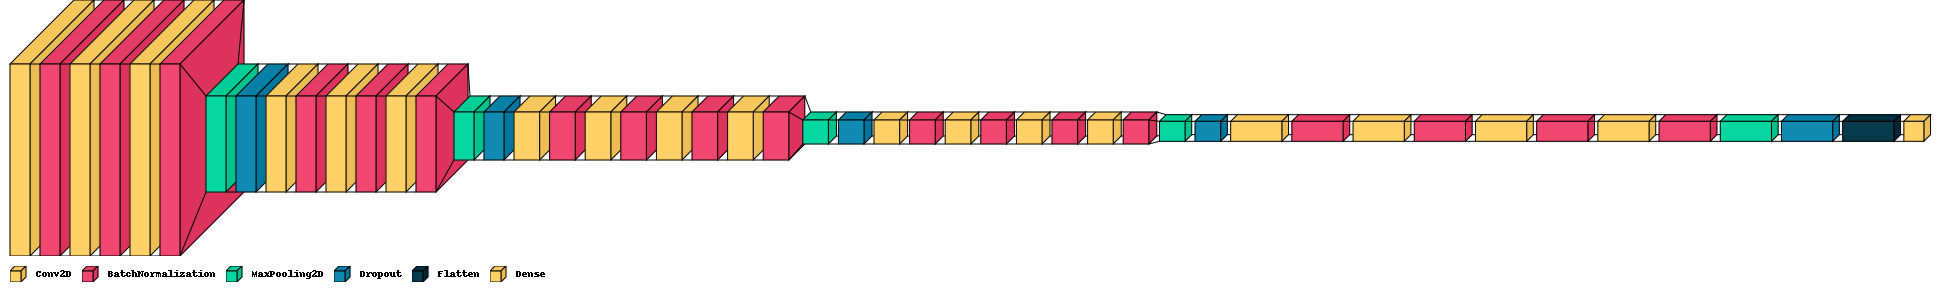

In [ ]:
visualkeras.layered_view(seq, legend=True)

In [ ]:
his = seq.fit(X_train, y_train2, batch_size=64, epochs=88)

Epoch 1/88
449/449 [==============================] - 37s 78ms/step - loss: 2.2074 - accuracy: 0.2275
Epoch 2/88
449/449 [==============================] - 35s 78ms/step - loss: 1.8707 - accuracy: 0.2557
Epoch 3/88
449/449 [==============================] - 35s 79ms/step - loss: 1.7475 - accuracy: 0.2857
Epoch 4/88
449/449 [==============================] - 36s 79ms/step - loss: 1.6359 - accuracy: 0.3470
Epoch 5/88
449/449 [==============================] - 36s 80ms/step - loss: 1.5243 - accuracy: 0.4050
Epoch 6/88
449/449 [==============================] - 36s 80ms/step - loss: 1.4328 - accuracy: 0.4464
Epoch 7/88
449/449 [==============================] - 36s 80ms/step - loss: 1.3647 - accuracy: 0.4777
Epoch 8/88
449/449 [==============================] - 36s 80ms/step - loss: 1.3249 - accuracy: 0.4928
Epoch 9/88
449/449 [==============================] - 36s 80ms/step - loss: 1.2939 - accuracy: 0.5055
Epoch 10/88
449/449 [==============================] - 36s 81ms/step - loss: 1.266

In [ ]:
y_pt = seq.predict(X_test)

In [ ]:
y_p = []
for i in range(sz):
    y_p.append(np.argmax(y_pt[i]))

**Ma trận nhầm lẫn**

In [ ]:
mat = confusion_matrix(y_test, y_p, labels=[0,1,2,3,4,5,6])
mat

array([[257,   8,  53,  22,  61,  11,  55],
       [  9,  32,   1,   2,  11,   0,   1],
       [ 33,   7, 228,  20, 106,  40,  62],
       [ 13,   3,  11, 781,  14,  19,  54],
       [ 60,   3,  73,  25, 363,   4, 125],
       [ 13,   0,  29,  20,  10, 330,  13],
       [ 28,   0,  23,  49,  86,   4, 417]])

**Accuracy trên tập kiểm thử**

In [ ]:
truee = 0
for i in range(7):
    truee += mat[i,i]
truee / sz

0.6709389802173308

> *Nhận xét:* Dù accuracy trên tập train không bằng ở lần huấn luyện mô hình ban đầu nhưng accuracy trên tập test có chút cải thiện.



**Lưu mô hình**

In [ ]:
seq.save('/content/drive/MyDrive/datasets/seq_model22.sav')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/datasets/seq_model22.sav/assets


In [ ]:
loaded_model = load_model('/content/drive/MyDrive/datasets/seq_model22.sav')